In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

import pickle

import warnings
warnings.filterwarnings('ignore')

In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [46]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [47]:
df.shape

(7043, 21)

In [48]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
# pd.set_option('display.max_columns', None)

In [50]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
# Dropping the customer id column, not required
df = df.drop(columns = ["customerID"])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [53]:
# the unique values in all the columns
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [54]:
num_columns_list = ["tenure", "MonthlyCharges","TotalCharges"]
for col in df.columns:
  if col not in num_columns_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [55]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [56]:
# df['TotalCharges'] = df['TotalCharges'].astype(float)

In [57]:
#df[df["TotalCharges"] == " "]

In [58]:
len(df[df['TotalCharges'] == ' '])

11

In [59]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [60]:
# checking the distribution of the target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**INSIGHTS:**
1. Removed the customerID column, not required for the modelling
2. No null or missing values in the dataset except the TotalCharges column
3. The TotalCharges column had 11 missing values with " " format, replaced them with 0.0
4. Class imbalance identified in target column

**EDA**

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features Analysis**
   - Understand the distribution of the numerical feature
   - the num feature arent evenly distributed
   - no presence of outliers
   - the tenure and totalcharges column are highly correlated, bit common sense to use cuz bill system is depend on tenure

In [62]:
def plot_hist(df, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde = True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values of the column
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle='dashed', label = "Mean")
  plt.axvline(col_median, color='green', linestyle='dashed', label = "Median")

  plt.legend()
  plt.show()

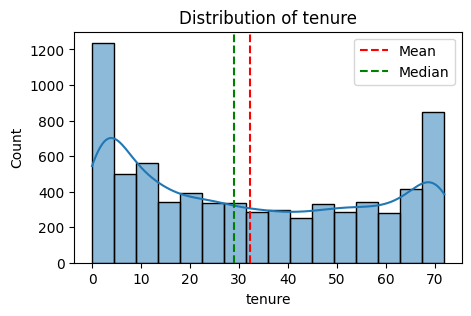

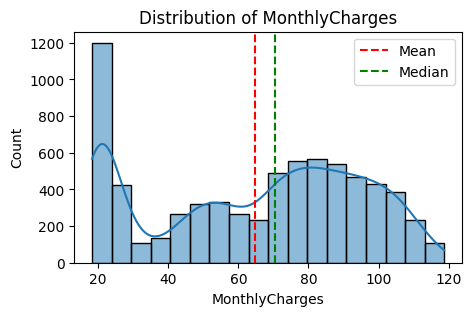

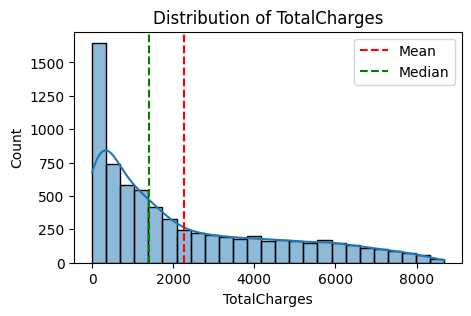

In [63]:
for col in num_columns_list:
  plot_hist(df, col)
# all the charts at once

In [64]:
def plot_box (df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(df[column_name])
  plt.title(f"Box_Plot of {column_name}")
  plt.show()


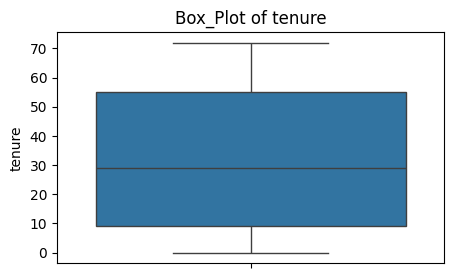

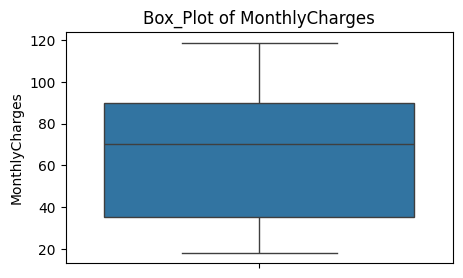

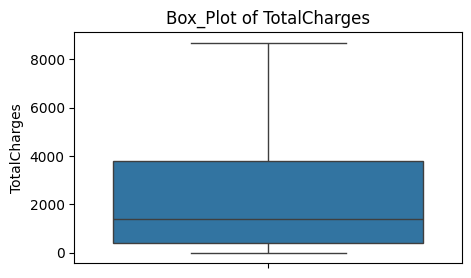

In [65]:
for col in num_columns_list:
  plot_box(df, col)

**Correlation Heatmap Of Numerical Feature**

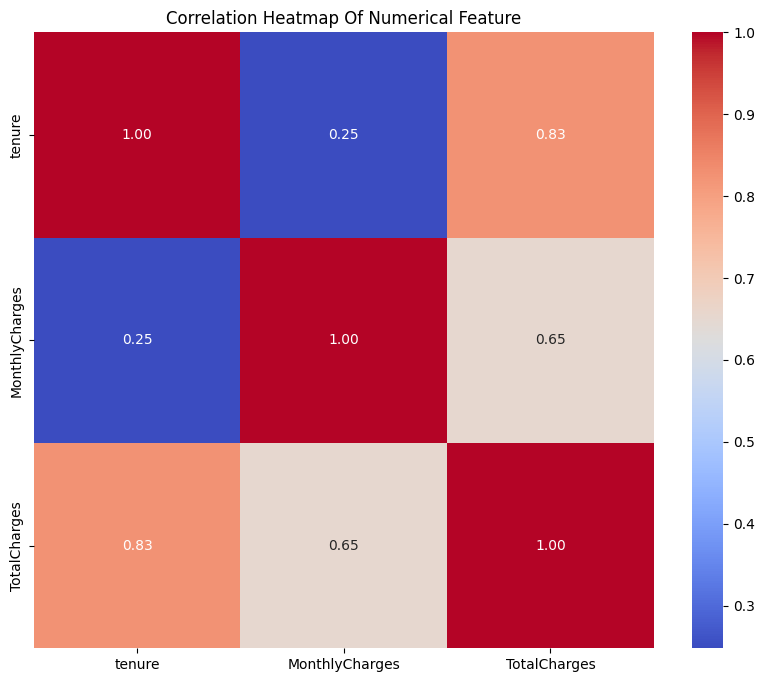

In [66]:
# correlation matrix heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_columns_list].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap Of Numerical Feature")
plt.show()

**Cat feature Analysis**
 - Imbalance in the target feature is a bigger issue than the feature column imbalances

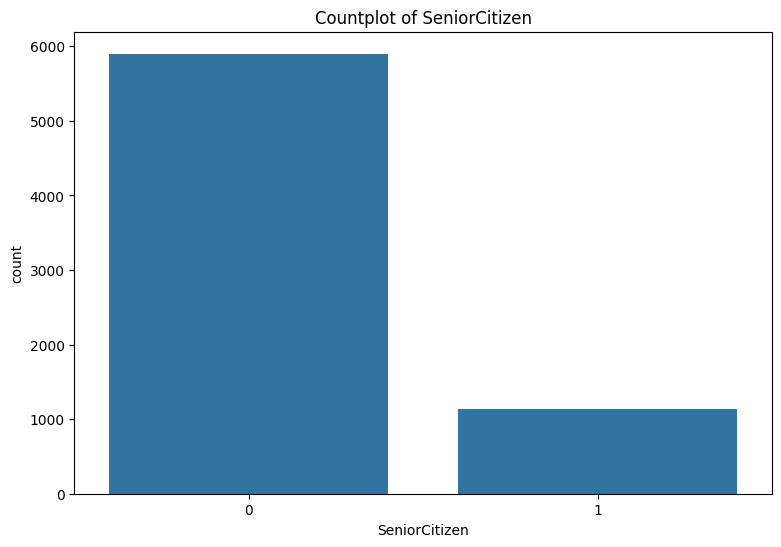

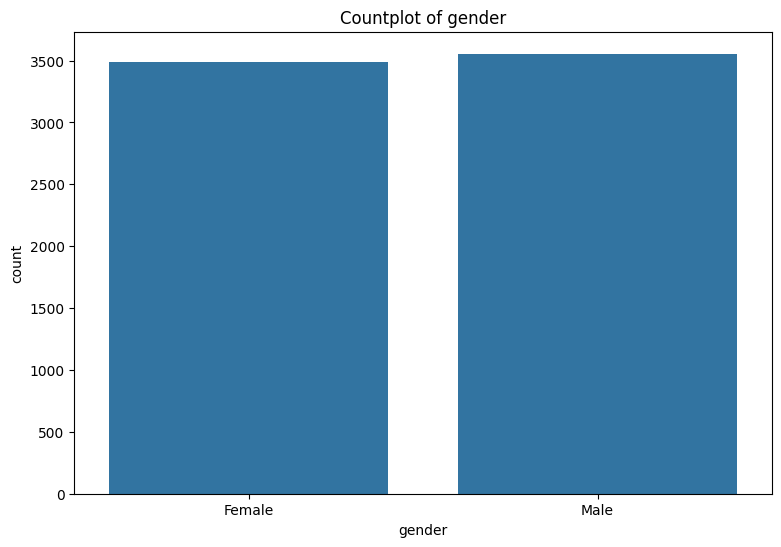

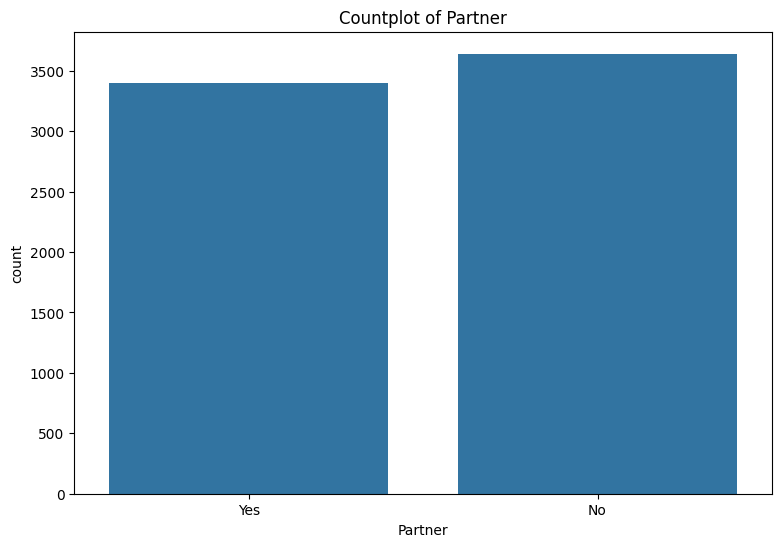

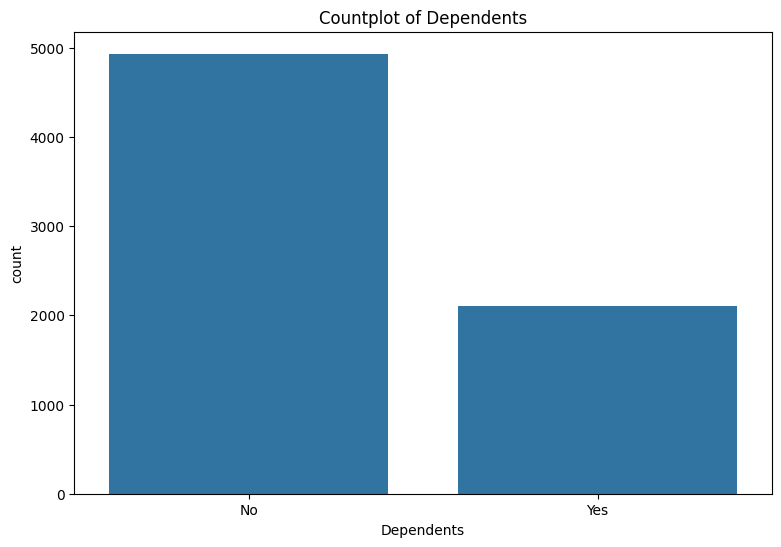

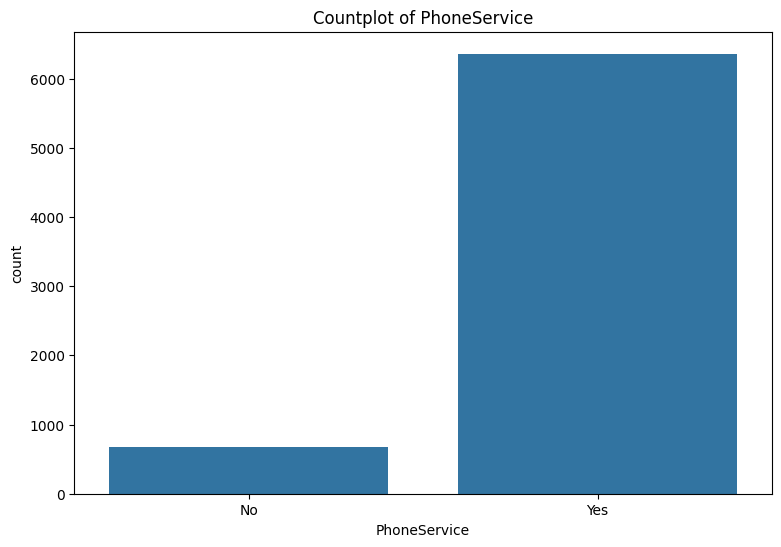

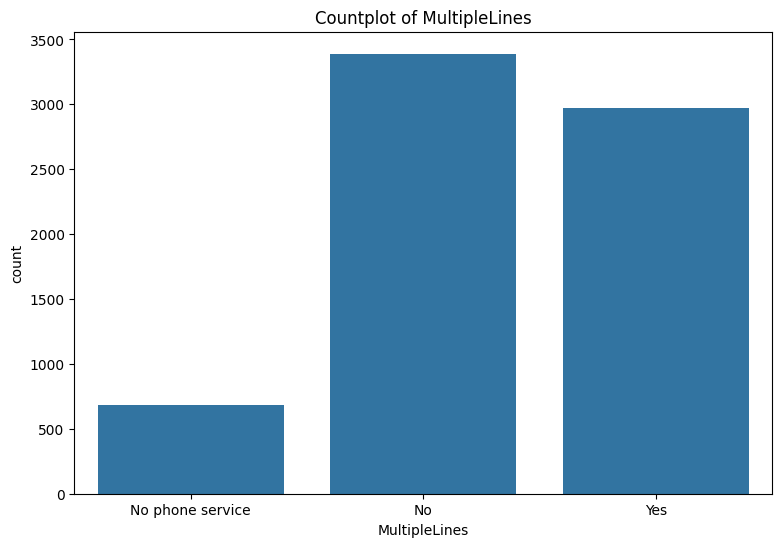

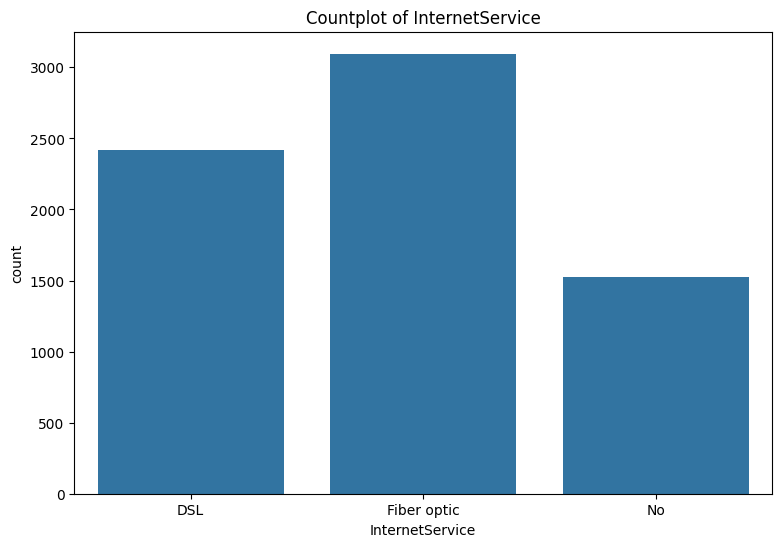

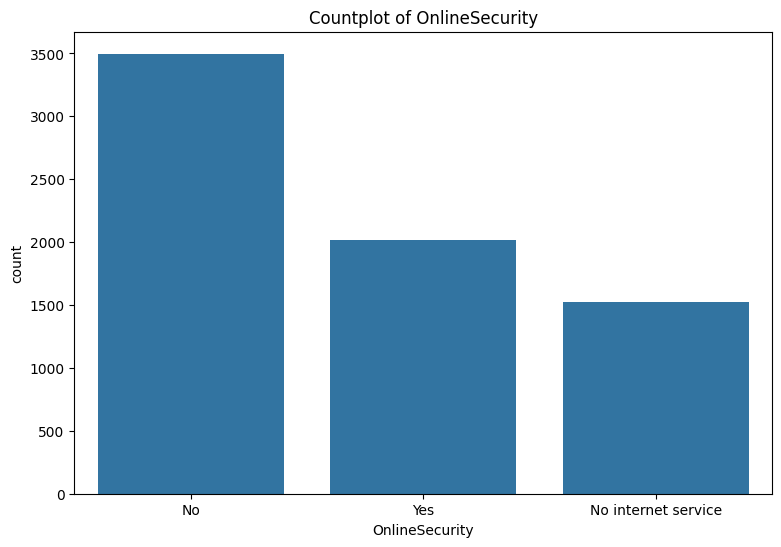

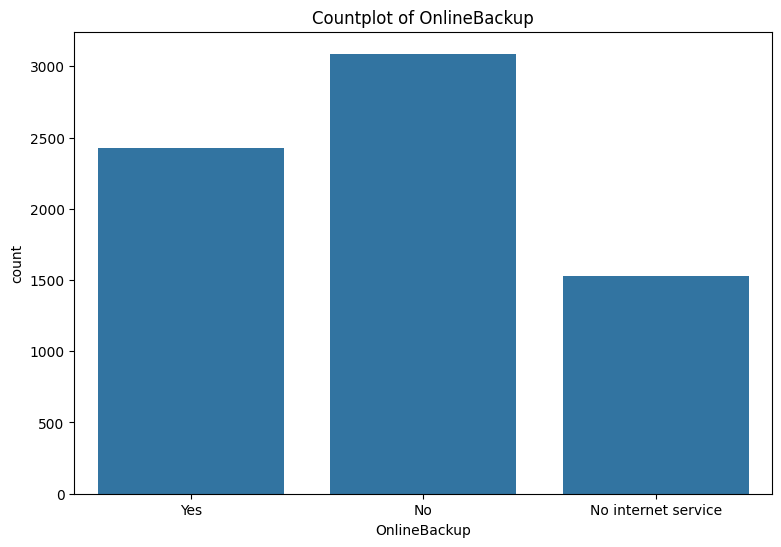

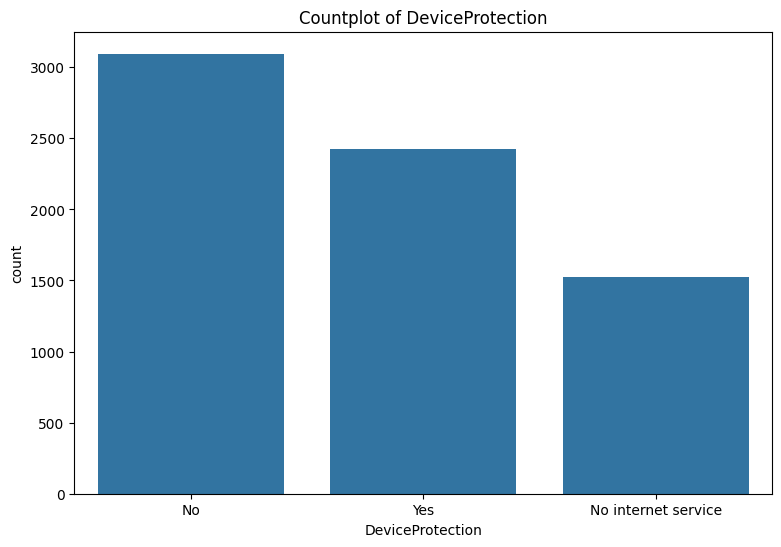

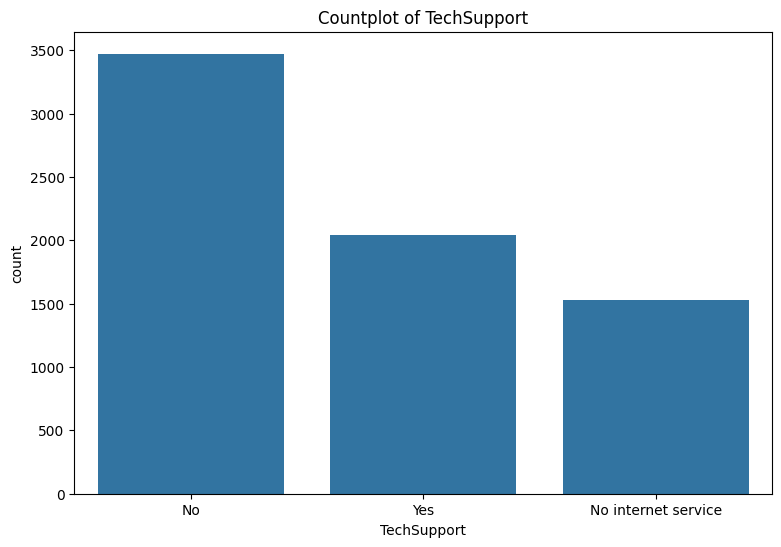

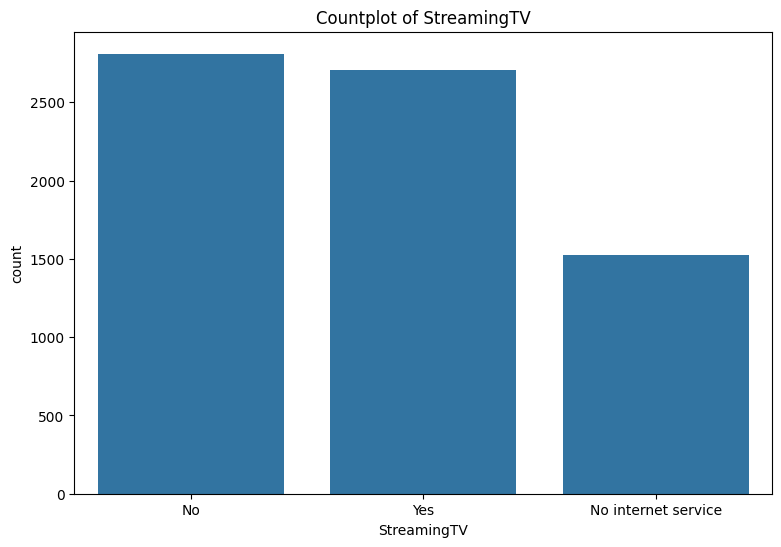

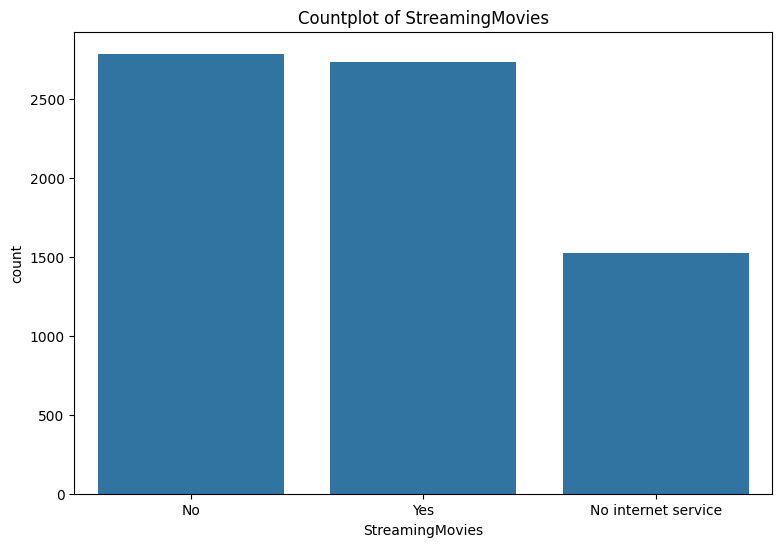

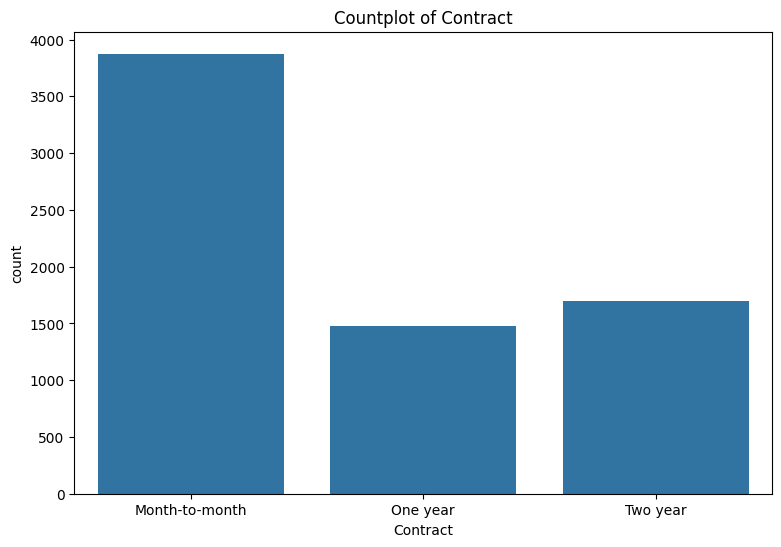

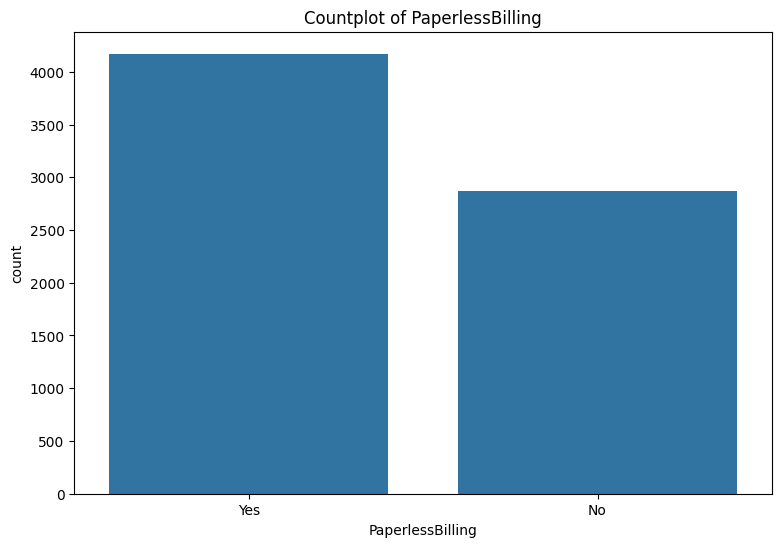

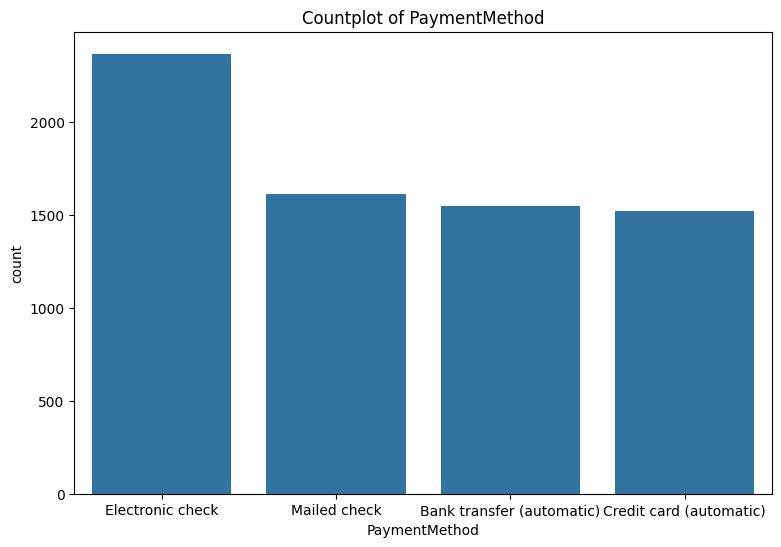

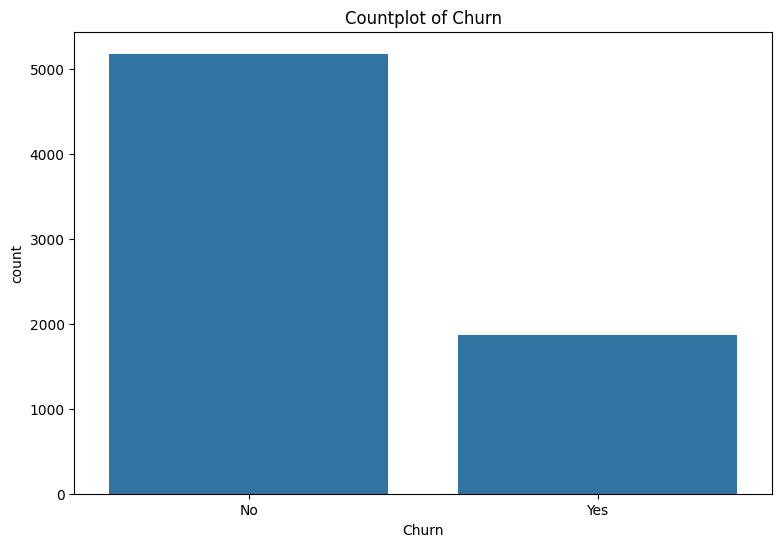

In [67]:
cat_column_list = df.select_dtypes(include = "object").columns.to_list()
cat_column_list.insert(0, "SeniorCitizen")
cat_column_list

# countplot for cat_column_list
for col in cat_column_list:
  plt.figure(figsize=(9,6))
  sns.countplot(x = df[col])
  plt.title(f"Countplot of {col}")
  plt.show()

**Data Preprocessing**

In [68]:
# Label encoding of target column [Churn]
df['Churn']  = df['Churn'].replace({"Yes": 1, "No": 0})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [69]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [70]:
# label encoding of the other categorical feature
# label encoding is sufficient for XGBoost, RandomForest and Decision Trees
object_cols = df.select_dtypes(include = "object").columns
object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [71]:
# initialize a dictionary to save the encoders,
# later we will save this encoder as pickle file to predicting on new and unknown data points we can use this transform.

encoders = {}
for col in object_cols:
  label_encoder = LabelEncoder()
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder

# save this encoder to pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

**Training and Test Data Split**

In [72]:
# splitting the features and target
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [73]:
# splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [74]:
# print(y_train.value_counts())
# print(y_train).shape

**Performing SMOT**
- synthetic minority oversampling technique

In [75]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [76]:
print(y_train_smote.shape)

(8276,)


In [77]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model Training**

###### Training with default hyperparameters

In [78]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}
# dictionary to store cross val results
cv_score = {}

# perform 5-fold cross val for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_score[model_name] = scores
    print(f"{model_name} cross- validatoin accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters
Decision Tree cross- validatoin accuracy: 0.78
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross- validatoin accuracy: 0.84
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross- validatoin accuracy: 0.83
--------------------------------------------------


**Random Fores having higher accuracy**

In [79]:
rfc = RandomForestClassifier(random_state=42)

In [80]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [81]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


**Model Evaluation**

In [85]:
# evaluating on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy_Score: \n", accuracy_score(y_test, y_test_pred))
print("Confusion_Matrix: \n", confusion_matrix(y_test, y_test_pred))
print("Classification_Report: \n", classification_report(y_test, y_test_pred))

Accuracy_Score: 
 0.7785663591199432
Confusion_Matrix: 
 [[878 158]
 [154 219]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [86]:
# save the trained model as a pickle file
model_data = {"model": rfc, "feature_names": X.columns.tolist()}
with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**Load the saved model and build the predictive system**

In [87]:
# load the saved model to the encoders and feature names
with open ("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

  loaded_model = model_data["model"]
  feature_names = model_data["feature_names"]

In [88]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [90]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [101]:
data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([data])
with open ("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode the categorical features using the saved encoders
for column, encoders in encoders.items():
  input_data_df[column] = encoders.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)
# results
print(f"prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"prediction probability: {pred_prob}")

[0]
prediction: No Churn
prediction probability: [[0.78 0.22]]


**To Do for better results**
 - hyperparameter tuning
 - try model selection
 - try downsampling
 - try to address the overfitting problem
 - try to stratified k-fold CV